<a href="https://colab.research.google.com/github/saumyasingh18/Insurance-Claims-Fraud-Analysis-EDA-Project-/blob/main/EDA(Insurance_Claims_%26_Fraud_Analysis)By_Saumya_singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Insurance Claims & Fraud Analysis

**Project Type --** EDA

**Project presented by --** Saumya Singh

# Project summery

**Problem Statement--** Insurance fraud is a critical challenge for companies, leading to significant financial losses. Detecting fraudulent claims early can reduce risks, improve profitability, and ensure fair pricing for genuine customers.
This project uses Exploratory Data Analysis (EDA) to uncover patterns, anomalies, and demographic trends in insurance claims data.


**Objective--** Identify key fraud

*   indicators using statistical and visual methods.

*  Compare fraud vs non-fraud claims across demographics, policies, and geographies.

* Use clustering and PCA to segment customers and detect unusual behavior.

* Provide business insights for fraud prevention and risk management.

**Importing Libraries**  

The notebook begins by importing essential Python libraries: numpy for numerical operations, pandas for data manipulation, matplotlib.pyplot and seaborn for data visualization. This sets up the environment for the analysis.

In [2]:
#data handling
import numpy as np
import pandas as pd
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
#PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


Mounts Google Drive so datasets stored there can be accessed. force_remount=True ensures remounting if already mounted.

In [118]:
# Importing datasets from google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
path="/content/drive/MyDrive/gncipl/fraud_insurance_claims.csv"

Mounted at /content/drive


or

In [ ]:
# Importing dataset from github repository

path="https://github.com/saumyasingh18/Insurance-Claims-Fraud-Analysis-EDA-Project-/blob/main/fraud_insurance_claims.csv"


Reads CSV files into pandas DataFrames.Copies into df1_clean, df2_clean for safe transformations.
Prints column lists and counts for inspection.

In [119]:
# Reading the CVS file
df1=pd.read_csv(path)

# Copying the dataset for cleaning
df1_clean=df1.copy()

print("List of Columns of Global Insurance dataset:\n",df1.columns.tolist())
print(len(df1.columns.tolist()))

List of Columns of Global Insurance dataset:
 ['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported']
39


In [120]:
# Dataset First look
print("Insurance dataset:\n")
display(df1_clean.head())


Insurance dataset:



,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014 0:00,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006 0:00,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000 0:00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990 0:00,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014 0:00,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


# 1. Dataset  Information

The df.info() method is used to get a concise summary of the DataFrame. This is a crucial step for data quality assessment as it shows the data types of each column and highlights if there are any non-null counts that are less than the total number of rows, indicating missing values.

In [121]:
# Dataset Information
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Rows and Column count

In [122]:
print("Row and Column Information of Insurance dataset:")
print("Number of Rows: ",df1_clean.shape[0],"\nNumber of Columns: ",df1_clean.shape[1])

Row and Column Information of Insurance dataset:
Number of Rows:  1000 
Number of Columns:  39


Duplicate values

In [123]:
# Dulicate values in global dataset
print("Duplicate values in Insurance dataset: \n",df1_clean.duplicated().sum())

Duplicate values in Insurance dataset: 
 0


Missing values/Null values

In [124]:
# Missing Value in dataset
print("Missing values in Insurance dataset: \n")
df1_clean.isnull().sum()


Missing values in Insurance dataset: 



,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


Visualisation of Missing values uses a matrix plot to display the structure of missing values across the dataset. Each vertical line represents a record, and the shading indicates missing vs. non-missing entries. In this dataset, the majority of fields are complete, but a few columns such as authorities_contacted and police_report_available initially showed gaps.

<Figure size 1600x400 with 0 Axes>

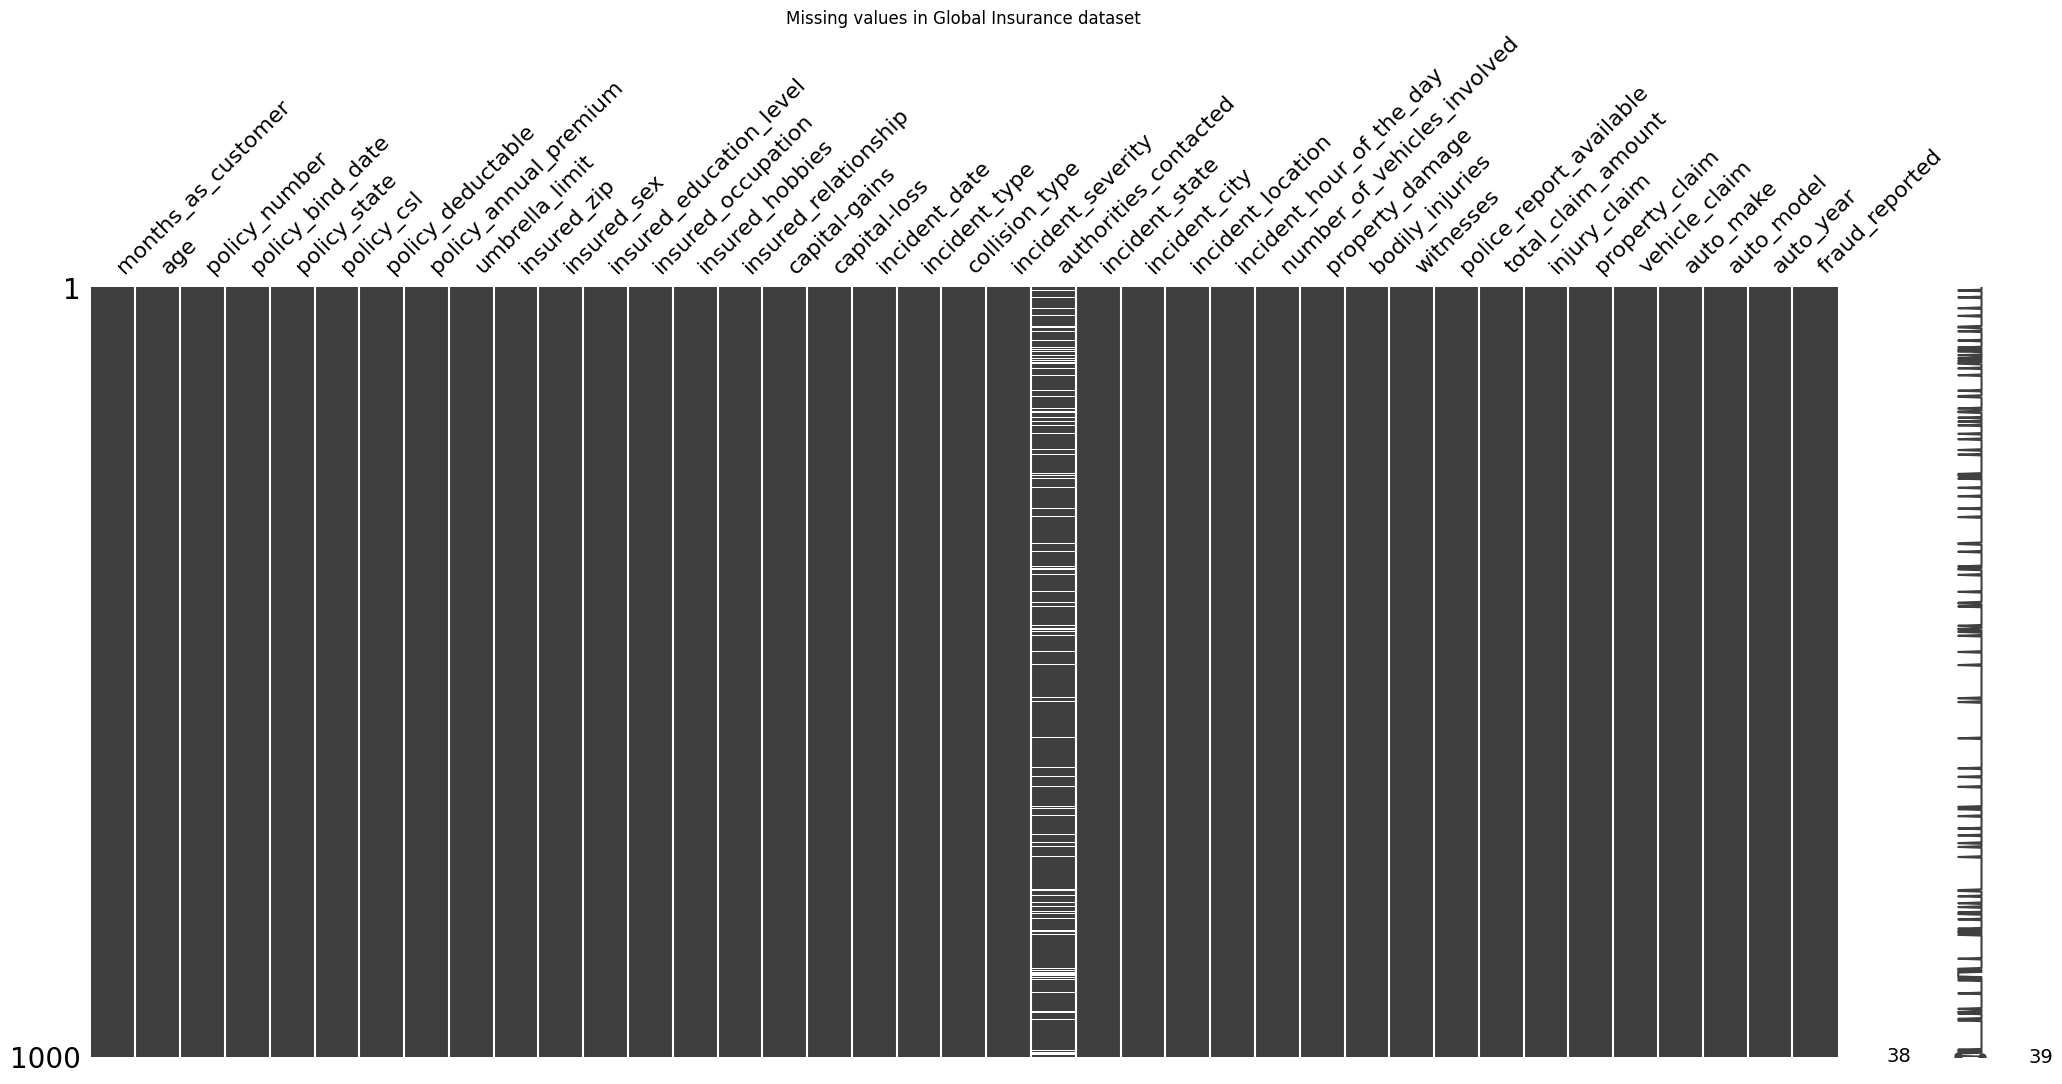

In [125]:
# Visualisation of Global dataset
plt.figure(figsize=(16,4))
msno.matrix(df1_clean)
plt.title("Missing values in Global Insurance dataset")
plt.show()

# 2. Understanding your Values

In [126]:
print("Column Present Insurance dataset:\n")
print(df1_clean.columns)
print("\nDatatype of columns of dataset: \n")
print(df1_clean.dtypes)

Column Present Insurance dataset:

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

Datatype of columns of dataset: 

months_as_customer               int64
age                              int64
policy_n

Dataset discription

In [127]:
print("Insurance dataset:\n")
df1_clean.describe()

Insurance dataset:



,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,204.469000,38.989000,547524.07000,1143.000000,1257.140500,1.105000e+06,501521.994000,25329.200000,-26913.200000,11.598000,1.836000,0.988000,1.488000,52898.310000,7442.470000,7407.310000,38003.530000,2005.116000
std,115.363095,9.144425,257190.22316,614.759245,244.253322,2.304623e+06,71791.721949,27867.685862,28156.376317,6.933142,1.021836,0.818857,1.105929,26322.069006,4870.738023,4808.335612,18828.006588,6.021362
min,0.000000,19.000000,100804.00000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,116.000000,32.000000,335980.25000,500.000000,1090.247500,0.000000e+00,448458.500000,0.000000,-51800.000000,6.000000,1.000000,0.000000,1.000000,42180.000000,4295.000000,4480.000000,30437.500000,2000.000000
50%,200.000000,38.000000,534461.50000,1000.000000,1260.440000,0.000000e+00,466583.500000,0.000000,-24200.000000,12.000000,1.000000,1.000000,1.000000,58355.000000,6775.000000,6755.000000,42140.000000,2005.000000
75%,277.250000,44.250000,760822.25000,2000.000000,1415.740000,0.000000e+00,603262.250000,51025.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70592.500000,11285.000000,10860.000000,50762.500000,2010.000000
max,479.000000,64.000000,999435.00000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


Variable Discription

In [128]:
# Checking Unique values of each variable in Global dataset
print("Unique values in Global Insurance dataset:\n")
display(df1_clean.nunique())

Unique values in Global Insurance dataset:



,0
months_as_customer,392
age,46
policy_number,990
policy_bind_date,944
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,981
umbrella_limit,11
insured_zip,985


# 3. Data Wrangling

1. Remove exact duplicates

In [129]:
print("Duplicate values in Global Insurance dataset: \n",df1_clean.duplicated().sum())
print("\nDropping duplicate rows.....\n")
df1_clean.drop_duplicates(inplace=True)
print("Shape after removing duplicates:",df1_clean.shape)

Duplicate values in Global Insurance dataset: 
 0

Dropping duplicate rows.....

Shape after removing duplicates: (1000, 39)


2. Fix inconsistent entries

In [130]:
print("Fixing inconsistent entries.....\n")
# Correct spelling issues in 'thal'
df1_clean['police_report_available'] = df1_clean['police_report_available'].replace('?', 'NO')

Fixing inconsistent entries.....



3. Handling Missing Values

Missing values are not randomly scattered but concentrated in specific features, implying that some attributes are less consistently reported. Since fraud detection is highly sensitive to missing information, handling these nulls properly is critical.

The bar chart summarizes the count of missing values per column. It provides a clearer numeric view compared to the matrix. In the raw dataset, a noticeable proportion of values were missing for authorities_contacted, while other variables had very few or none. After imputation (e.g., filling missing values with "Not reported"), the bar chart confirms successful handling.

Checking for missing values.....

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted          106
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage      

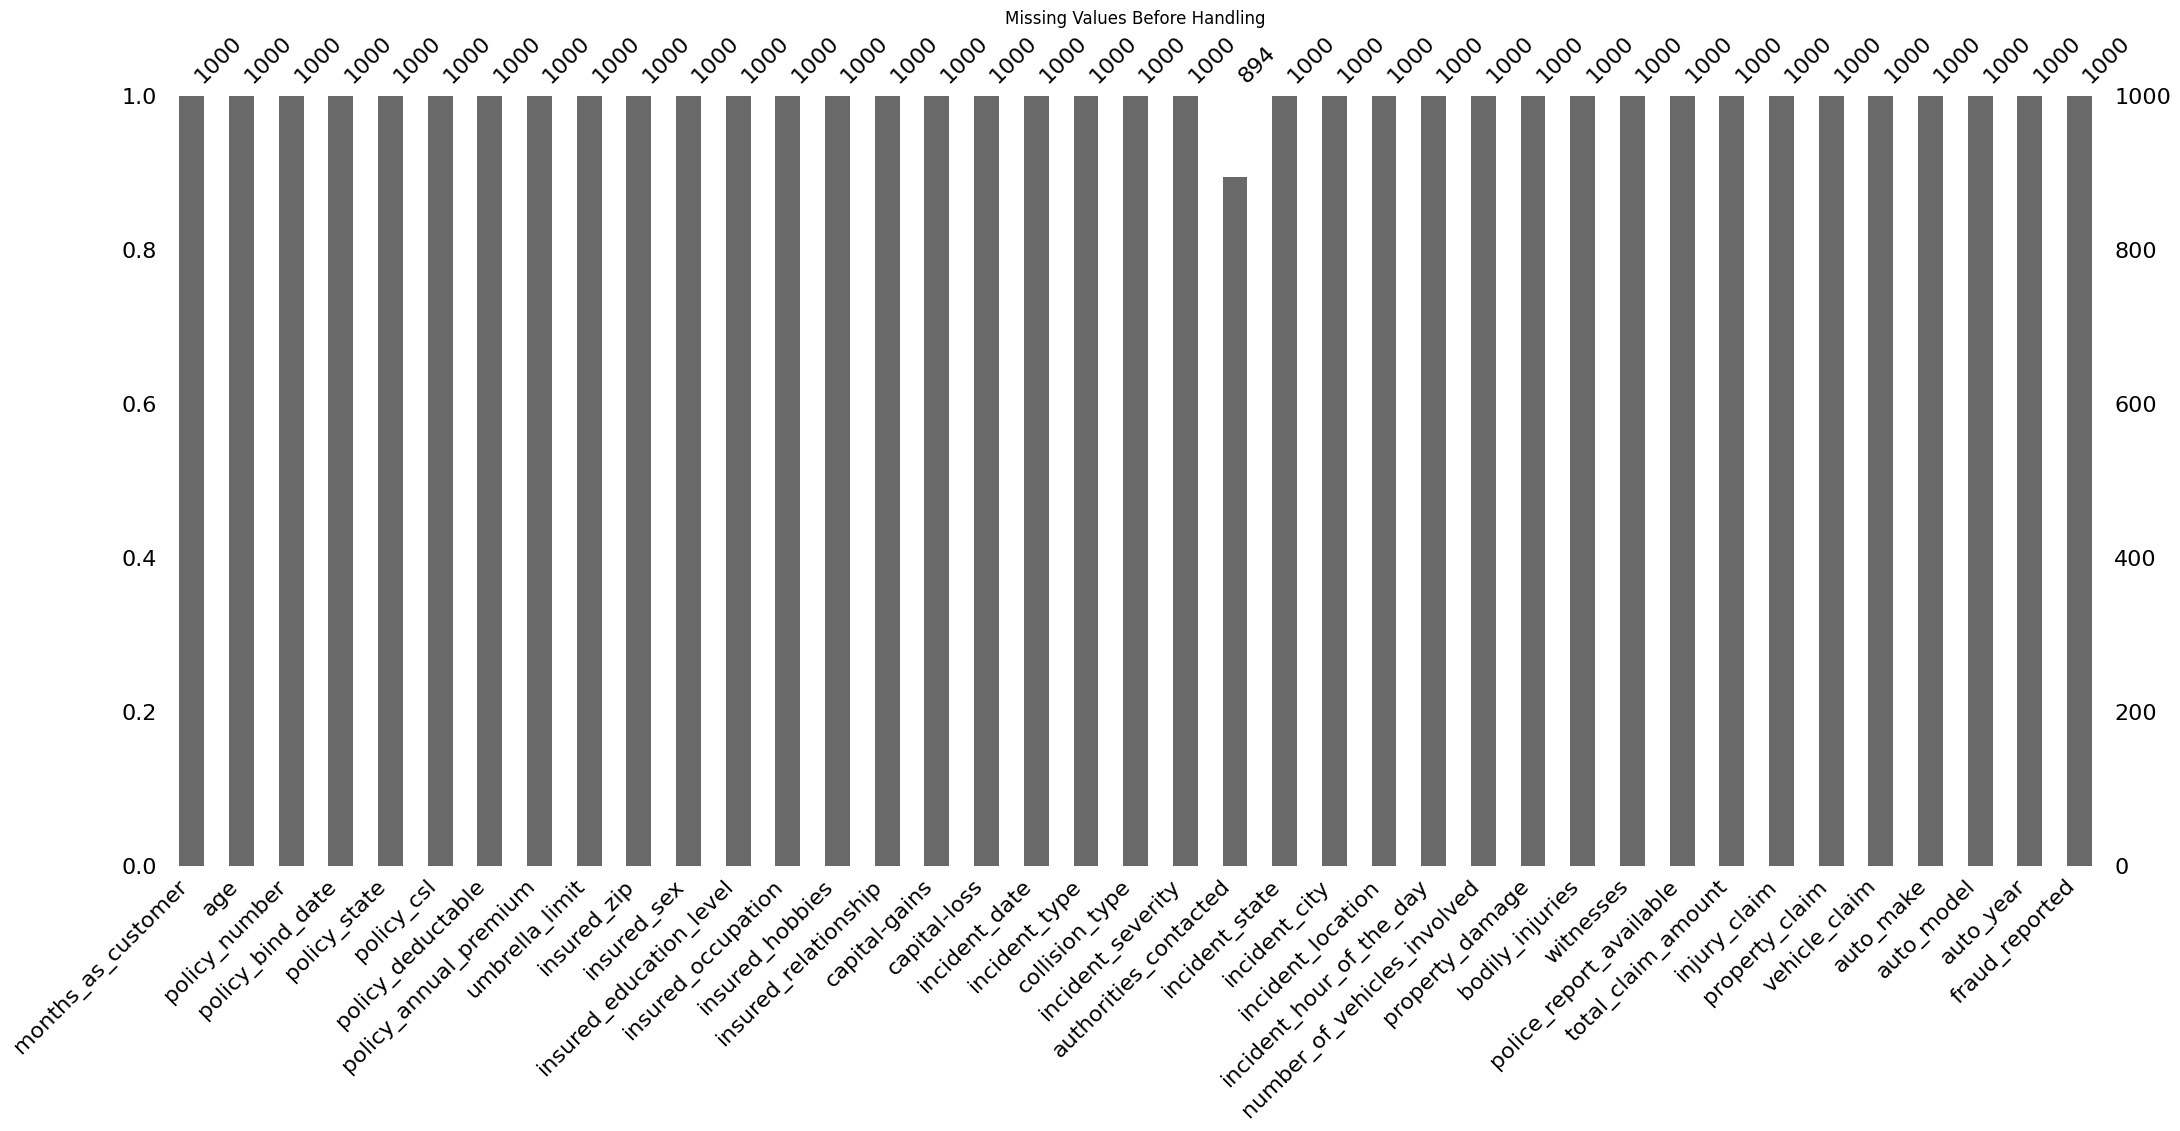


Total missing Value--  106

Checking for missing values after handling.....

Total missing Value left--  0


In [131]:
print("Checking for missing values.....\n")
print(df1_clean.isnull().sum())
msno.bar(df1)
plt.title("Missing Values Before Handling")
plt.show()
print("\nTotal missing Value-- ",df1_clean.isnull().sum().sum())

#Authority Contacted: Missing means no authority called
df1_clean['authorities_contacted'] = df1_clean['authorities_contacted'].fillna('Not reported')
print("\nChecking for missing values after handling.....\n")
print("Total missing Value left-- ",df1_clean.isnull().sum().sum())


#Analysis

1. **Fraud vs Non-Fraud Distribution (Countplot)**

This bar plot shows the raw distribution of fraudulent (Y) vs. non-fraudulent (N) claims. As expected, non-fraudulent claims dominate the dataset, while fraudulent claims represent a smaller portion.

 **Insight:** The dataset is imbalanced, with far more non-fraud cases. While this reflects reality in the insurance industry (fraud is relatively rare), it has implications for analysis and modeling.

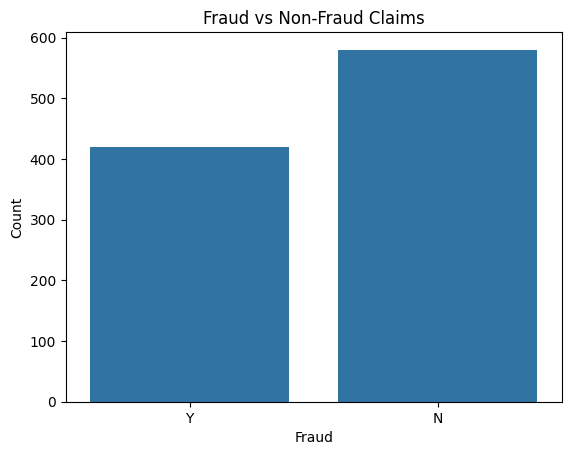

In [132]:
# Fraud vs Non-Fraud distribution
sns.countplot(x='fraud_reported', data=df1_clean )
plt.xlabel("Fraud")
plt.ylabel("Count")
plt.title("Fraud vs Non-Fraud Claims")
plt.show()

**2. Claim Amount by Fraud (Boxplot):**
The boxplot compares total_claim_amount across fraud labels. Fraudulent claims (Y) exhibit greater spread and higher outliers, whereas non-fraudulent claims (N) are more tightly clustered around moderate amounts.

**Insight:** Fraudulent claims not only tend to be higher in amount but also more erratic, with extreme spikes. This pattern indicates that fraudsters often inflate claim amounts disproportionately compared to genuine claimants, making claim value a strong fraud signal when combined with other features.

In [133]:
# Box plot of outliers

fig=px.box(df1_clean,x='fraud_reported',y='total_claim_amount',title='Outlier Distribution in Fraud vs Non-Fraud Claims')
fig.update_layout(width=500,height=600)
fig.show()

**3. Claim Amount vs Fraud (Histogram) :**
The histogram illustrates the frequency distribution of claim amounts for fraudulent vs non-fraudulent cases. Non-fraudulent claims form a smoother, bell-like distribution concentrated around moderate values. Fraudulent claims, however, are more skewed toward the higher end, with noticeable bulges at unusually high amounts.

**Insight:** Fraudsters appear to target larger payouts, leading to a shift of the fraud histogram toward the right tail. This reinforces the idea that unusually high claim amounts warrant closer scrutiny.

In [144]:
# Histogram of Claim amount Vs Policy Type
fig=px.histogram(df1_clean,x='total_claim_amount',nbins=40,color='fraud_reported',title='Claim Amount Vs Potential Fraud')
fig.update_layout(width=800,height=600)
fig.update_layout(barmode='group')
fig.show()

**4. Claim Amount by Police Report Availability (Boxplot):**


Boxplot shows how claim amounts vary depending on whether a police report was filed. When no police report is available, claim amounts show wider dispersion and higher values, particularly among fraudulent cases. Conversely, claims with police reports tend to have lower and more consistent amounts.

**Insight**: Fraudulent claims are less likely to be backed by formal police reports. When claimants skip this step, it may indicate an attempt to avoid legal verification, and such cases deserve higher fraud risk weighting.

In [135]:
fig = px.box(df1_clean,
             x='police_report_available',
             y='total_claim_amount',
             color='fraud_reported',
             title="Claim Amount Distribution by Police Report Availability")

fig.show()


**5. Fraud Rate by Police Report Availability (Bar Chart):**
The grouped bar chart compares fraud rates between claims with and without police reports. The results are striking: the proportion of fraud is significantly higher in claims without police reports compared to those with reports.

**Insight:** Police reports serve as a deterrent and validation mechanism. The absence of such documentation correlates strongly with fraudulent intent. This makes police_report_available one of the most powerful categorical predictors in the dataset.

In [136]:

fig = px.bar(df1_clean.groupby("police_report_available")['fraud_reported'].value_counts(normalize=True).reset_index(),
             x='police_report_available', y='proportion', color='fraud_reported',
             barmode='group', title="Fraud Rate by availability of Police report",text='proportion')
fig.update_layout(width=800,height=600)
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.show()



**6. Fraud Rate by Authorities Contacted (Bar Chart):**
Fraud rates are broken down by which authority (if any) was contacted — e.g., Police, Fire Department, Ambulance, or None. The chart reveals that claims where no authority was contacted have the highest fraud proportion, whereas those involving formal authorities have relatively lower fraud.

**Insight:** Fraudsters prefer not to involve external bodies, likely to avoid external scrutiny. When official authorities are engaged, the likelihood of fraud drops, indicating that authority involvement acts as a fraud prevention layer.

In [137]:

fig = px.bar(df1_clean.groupby("authorities_contacted")['fraud_reported'].value_counts(normalize=True).reset_index(),
             x='authorities_contacted', y='proportion', color='fraud_reported',
             barmode='group', title="Fraud Rate by Reporting authority",text='proportion')
fig.update_layout(width=800,height=600)
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.show()

**7. Age vs Claim Amount (Fraud Anomalies):**
Scatter plot maps age against total_claim_amount, colored by fraud status, with an OLS trendline overlay. Fraudulent claims (red) often stand out as anomalies, lying outside the typical trend of age vs. claim amount followed by non-fraudulent claims (blue).

**Insight:** Fraudulent behavior does not follow the natural age-claim relationship seen in genuine cases. Certain age ranges — particularly younger and middle-aged claimants — show clusters of fraud anomalies. This highlights that age-based profiling, when combined with claim size, can help spot unusual patterns.

In [138]:
# Interactive scatter highlighting fraud anomalies
fig = px.scatter(df1_clean, x="age", y="total_claim_amount",
                 color="fraud_reported",color_discrete_map={"Y": "red","N": "blue"},
                 trendline="ols",
                 title="Fraud Anomaly Detection (Age vs Claim)")
fig.show()

**8. Claim Amount vs Policy Premium :**
Two scatter plots (one overall, one faceted by fraud status) show the relationship between claim amounts and annual policy premiums. Non-fraudulent claims generally follow a logical trend: higher premiums loosely correspond to higher claims. Fraudulent claims, however, often break this relationship, showing unusually large claims despite modest premiums.

**Insight:** A mismatch between premium paid and claim amount is a strong fraud signal. Fraudsters often attempt to claim far more than their policy realistically justifies. Models that monitor premium-to-claim ratios could effectively flag such cases.


In [139]:
fig=px.scatter(df1_clean,x='total_claim_amount',y='policy_annual_premium',color='fraud_reported',
                trendline="ols",
                title="Fraud Anomaly Detection (Claim vs Premium)")
fig.update_layout(width=900,height=500)
fig.show()


fig1=px.scatter(df1_clean,x='total_claim_amount',y='policy_annual_premium',color='fraud_reported',
                trendline="ols",facet_col="fraud_reported",
                title="Fraud Anomaly Detection (Claim vs Premium)")
fig1.update_layout(width=800,height=600)
fig1.show()

**9. Average Claim by Age & Fraud :**

The grouped bar chart shows average claim amounts across ages, split into fraudulent vs. non-fraudulent groups. Fraudulent claims consistently average higher amounts than non-fraudulent ones across multiple age bands, with some spikes where fraud dramatically overshoots genuine claims.

**Insight:** Fraudulent claims inflate averages across almost all ages, suggesting fraud is a consistent pattern rather than isolated to specific demographics. However, certain age groups (like late 20s to early 40s) show particularly high fraud averages, indicating potentially higher-risk demographics.


In [140]:
# Average claim by Age
age_fraud=df1_clean.groupby(['age','fraud_reported'])['total_claim_amount'].mean().reset_index()
fig=px.bar(age_fraud,x='age',y='total_claim_amount',color='fraud_reported',barmode='group',
             title="Average Claim Amount by Age and Fraud Reported",
           color_discrete_map={"Y": "red","N": "blue"})
fig.update_layout(width=800,height=600)
fig.show()

**10. Correlation Heatmap (Numerical Features):**

The heatmap displays correlations among numerical variables (age, total_claim_amount, policy_annual_premium, etc.). Overall, correlations are weak to moderate, with no single variable strongly predicting fraud.

 **Insight:** Fraud cannot be detected using a single numeric measure. Instead, it emerges from interactions among multiple features (e.g., claim vs premium mismatch, age vs claim anomalies). This validates the need for multivariate analysis and machine learning models to capture subtle patterns.

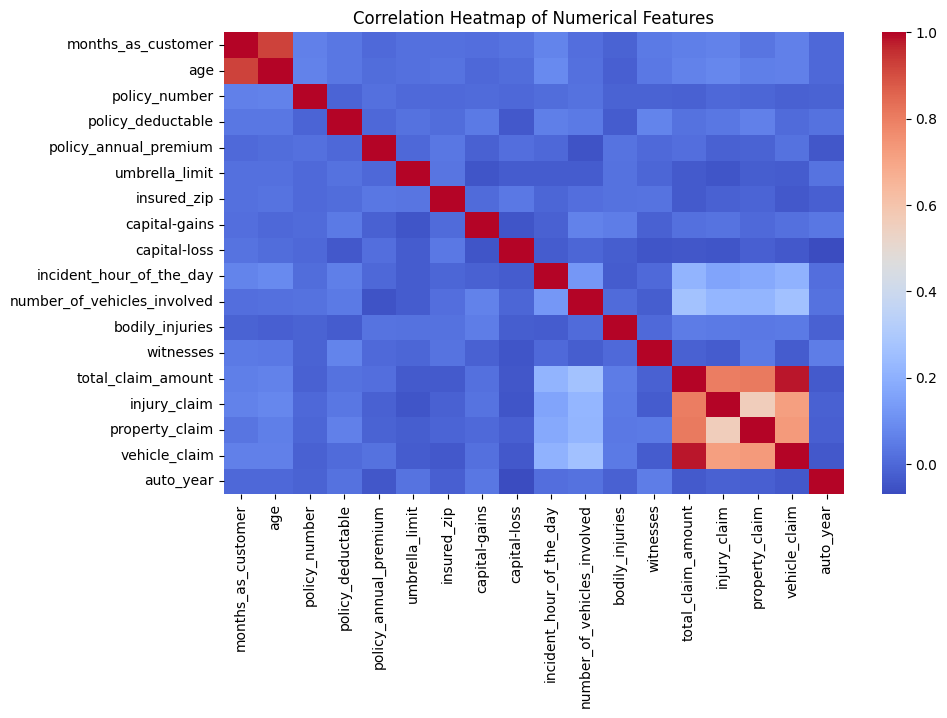

In [141]:
plt.figure(figsize=(10,6))
sns.heatmap(df1_clean.select_dtypes(include=['number']).corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# Conclusion

The EDA of insurance claims highlights that fraudulent claims, while fewer in number compared to genuine ones, pose significant financial and operational risks due to their higher amounts and irregular patterns.
* Fraudulent claims are disproportionately associated with missing police reports or lack of authority involvement, suggesting intentional avoidance of external verification.

* Claim amounts in fraudulent cases are larger and more erratic, often appearing as extreme outliers compared to genuine claims.

* Fraudsters tend to break logical relationships — for instance, between policy premiums and claim amounts, or between age and claim size — creating anomalies that stand out visually.

* Fraud is not limited to any single age or income group; instead, it cuts across demographics, though some age bands show elevated risks.
From a business perspective, these findings indicate that insurers should focus on multi-variable fraud detection approaches rather than relying on single features like age or income. In particular, combining claim-to-premium ratios, authority reporting behavior, and anomaly detection methods can substantially improve fraud identification.